In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df_train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df_test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#checking info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


array([<AxesSubplot:ylabel='None'>], dtype=object)

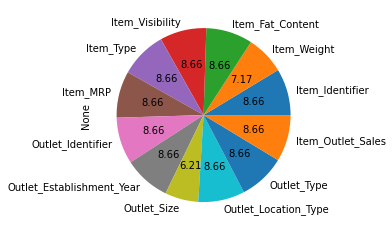

In [4]:
df_train.count().plot.pie(subplots=True,autopct='%.2f',radius=1)

In [5]:
#basic info about dataset
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
num=["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sale"]

In [7]:
cat=["Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Identifier"]
df_train[cat]

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FDA15
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DRC01
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FDN15
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,FDX07
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,NCD19
...,...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,FDF22
8519,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1,FDS36
8520,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,NCJ29
8521,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,FDN46


In [8]:
df_train[cat].nunique()

Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Identifier         1559
dtype: int64

<AxesSubplot:>

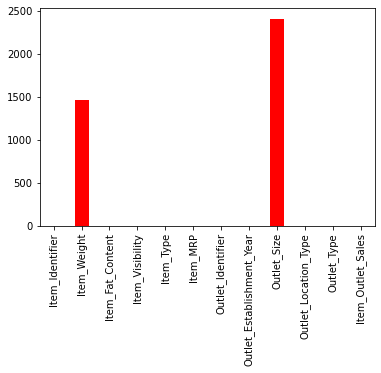

In [9]:
#checking nan value
df_train.isnull().sum().plot.bar(color="red")

<AxesSubplot:>

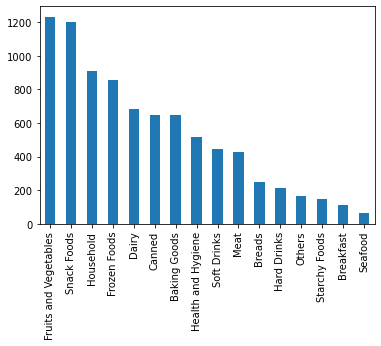

In [10]:
#univariate analysis
df_train['Item_Type'].value_counts().plot.bar()

<AxesSubplot:>

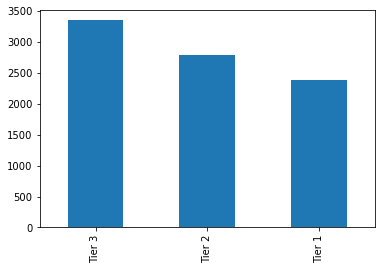

In [11]:
df_train['Outlet_Location_Type'].value_counts().plot.bar()

In [12]:
# replacing categorical column to numerical

df_train['Outlet_Identifier']=df_train['Outlet_Identifier'].replace(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'],[10,4,1,2,6,8,3,9,7,5])


df_train["Outlet_Type"]=df_train["Outlet_Type"].replace(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'],[2,3,1,4])


df_train["Outlet_Location_Type"]=df_train["Outlet_Location_Type"].replace(['Tier 1', 'Tier 3', 'Tier 2'],[1,3,2])


df_train["Outlet_Size"]=df_train["Outlet_Size"].replace(['Medium', 'nan', 'High', 'Small'],[2,None,3,1])


df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'],[1,2,1,1,2])

In [13]:
#splitting column into int and object
new=[]
for i in df_train["Item_Identifier"]:
    new.append(i[0:3])
df_train["Item_Identifier_1"]=new

In [14]:
new=[]
for i in df_train["Item_Identifier"]:
    new.append(i[3:5])
df_train["Item_Identifier_2"]=new

In [15]:
#dropping column
df_train.drop(["Item_Identifier"],axis=1,inplace=True)

In [16]:
#using labelencoder for object datatype
label=LabelEncoder()
df_train["Item_Type"] =  label.fit_transform(df_train["Item_Type"])
df_train["Item_Identifier_1"] =  label.fit_transform(df_train["Item_Identifier_1"])

In [17]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_1,Item_Identifier_2
0,9.300,1,0.016047,4,249.8092,10,1999,2.0,1,2,3735.1380,19,15
1,5.920,2,0.019278,14,48.2692,4,2009,2.0,3,3,443.4228,2,01
2,17.500,1,0.016760,10,141.6180,10,1999,2.0,1,2,2097.2700,32,15
3,19.200,2,0.000000,6,182.0950,1,1998,NaN,3,1,732.3800,42,07
4,8.930,1,0.000000,9,53.8614,2,1987,3.0,3,2,994.7052,48,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,2,1987,3.0,3,2,2778.3834,24,22
8519,8.380,2,0.046982,0,108.1570,8,2002,NaN,2,2,549.2850,37,36
8520,10.600,1,0.035186,8,85.1224,7,2004,1.0,2,2,1193.1136,54,29
8521,7.210,2,0.145221,13,103.1332,4,2009,2.0,3,3,1845.5976,32,46


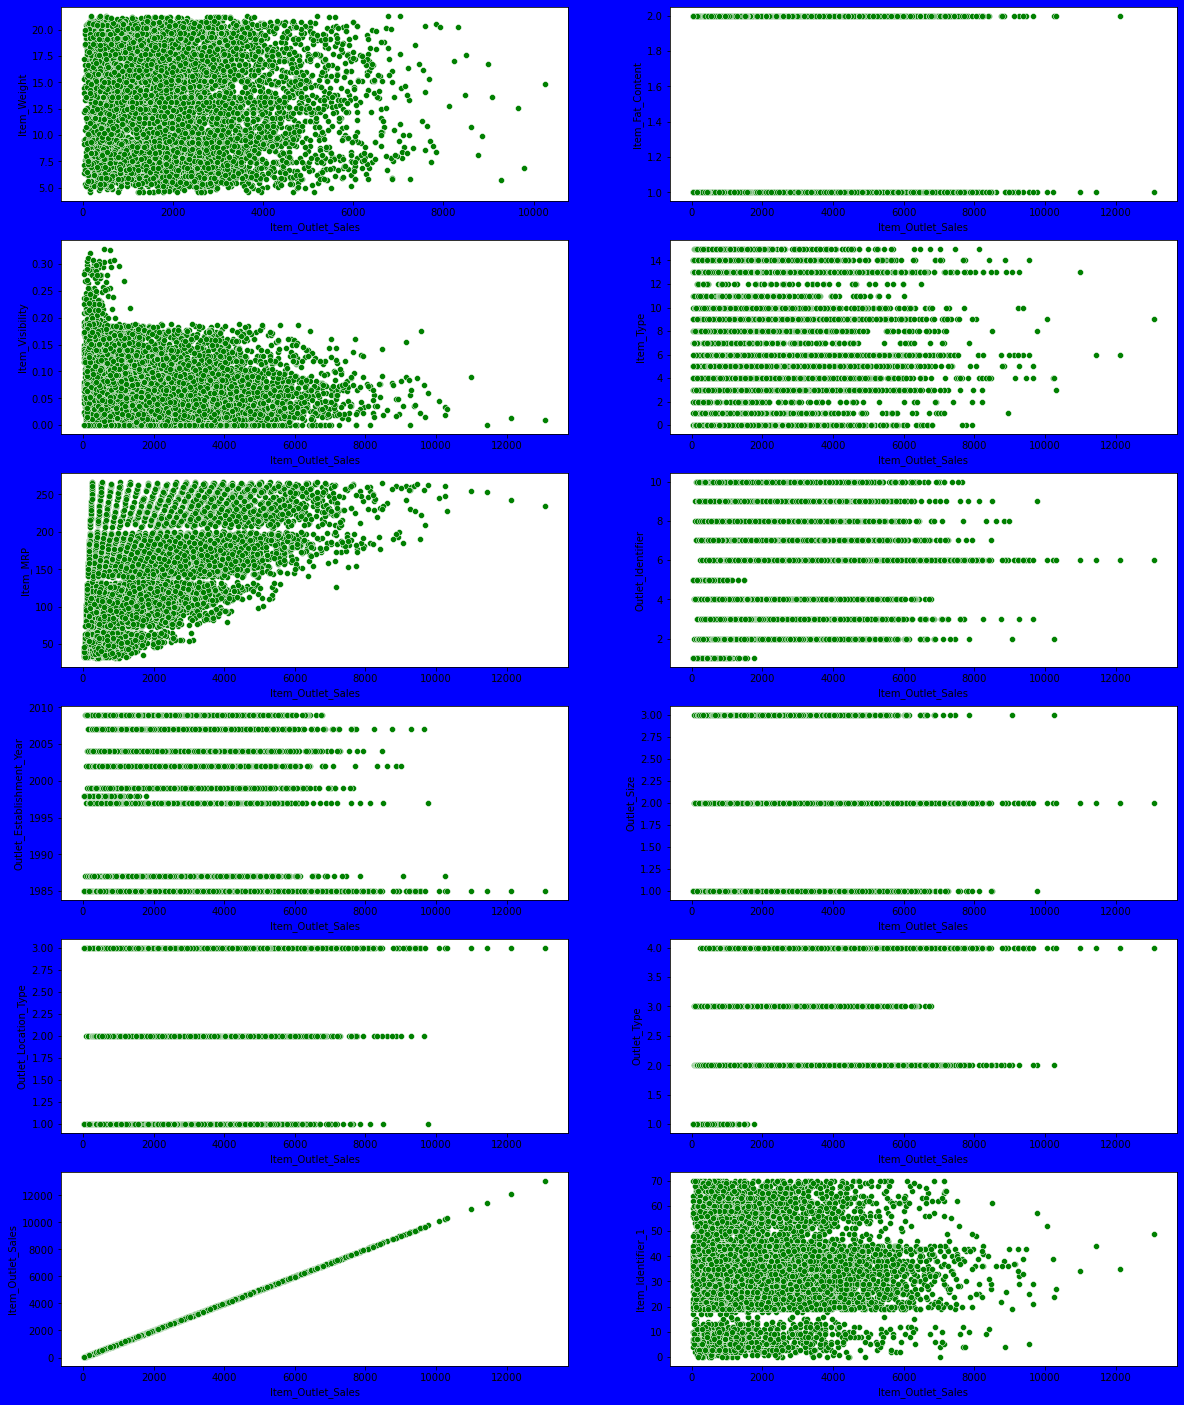

In [18]:
#bivariate analysis
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df_train:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.scatterplot(x=df_train["Item_Outlet_Sales"],y=df_train[column],color="green")
    plotnumber+=1
plt.show()

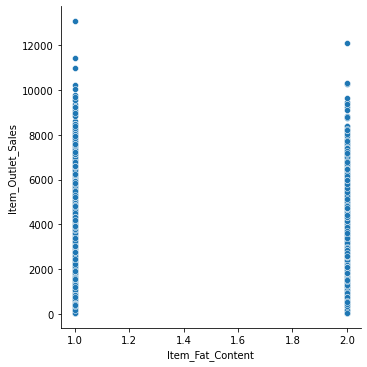

In [19]:
sns.relplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=df_train)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

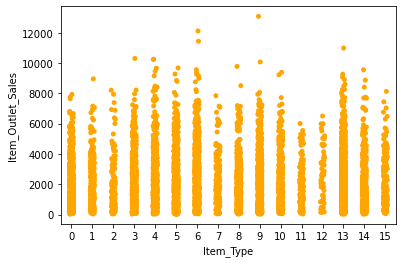

In [20]:
sns.stripplot(x="Item_Type",y="Item_Outlet_Sales",data=df_train,color='orange')

<function matplotlib.pyplot.show(close=None, block=None)>

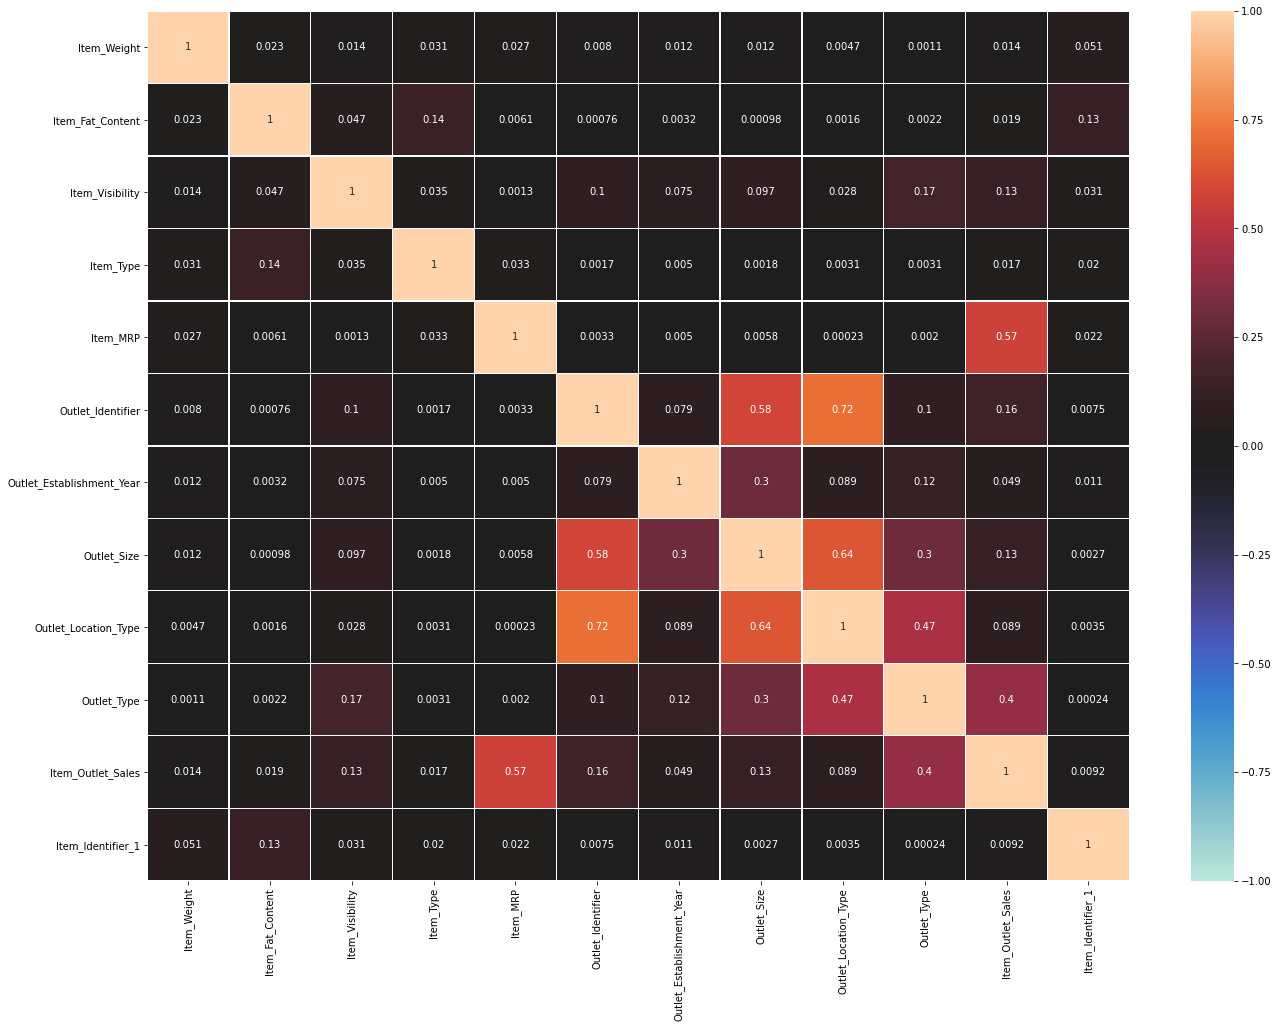

In [21]:
#multivariate analysis
df_corr=df_train.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

In [22]:
#using imputer for filling nan values
from sklearn .experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [23]:
iter_imputer= IterativeImputer(random_state=0)
iter_imputer.fit(df_train)

IterativeImputer(random_state=0)

In [24]:
df1=iter_imputer.transform(df_train)

In [25]:
cols=["Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales","Item_Identifier_1","Item_Identifier_2"]

In [26]:
df_train1=pd.DataFrame(df1[:,[df_train.columns.get_loc(i)for i in cols]],columns=cols)

In [27]:
df_train1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_1,Item_Identifier_2
0,9.300,1.0,0.016047,4.0,249.8092,10.0,1999.0,2.000000,1.0,2.0,3735.1380,19.0,15.0
1,5.920,2.0,0.019278,14.0,48.2692,4.0,2009.0,2.000000,3.0,3.0,443.4228,2.0,1.0
2,17.500,1.0,0.016760,10.0,141.6180,10.0,1999.0,2.000000,1.0,2.0,2097.2700,32.0,15.0
3,19.200,2.0,0.000000,6.0,182.0950,1.0,1998.0,2.739978,3.0,1.0,732.3800,42.0,7.0
4,8.930,1.0,0.000000,9.0,53.8614,2.0,1987.0,3.000000,3.0,2.0,994.7052,48.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13.0,214.5218,2.0,1987.0,3.000000,3.0,2.0,2778.3834,24.0,22.0
8519,8.380,2.0,0.046982,0.0,108.1570,8.0,2002.0,1.998296,2.0,2.0,549.2850,37.0,36.0
8520,10.600,1.0,0.035186,8.0,85.1224,7.0,2004.0,1.000000,2.0,2.0,1193.1136,54.0,29.0
8521,7.210,2.0,0.145221,13.0,103.1332,4.0,2009.0,2.000000,3.0,3.0,1845.5976,32.0,46.0


In [28]:
#checking nan value
df_train1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Identifier_1            0
Item_Identifier_2            0
dtype: int64

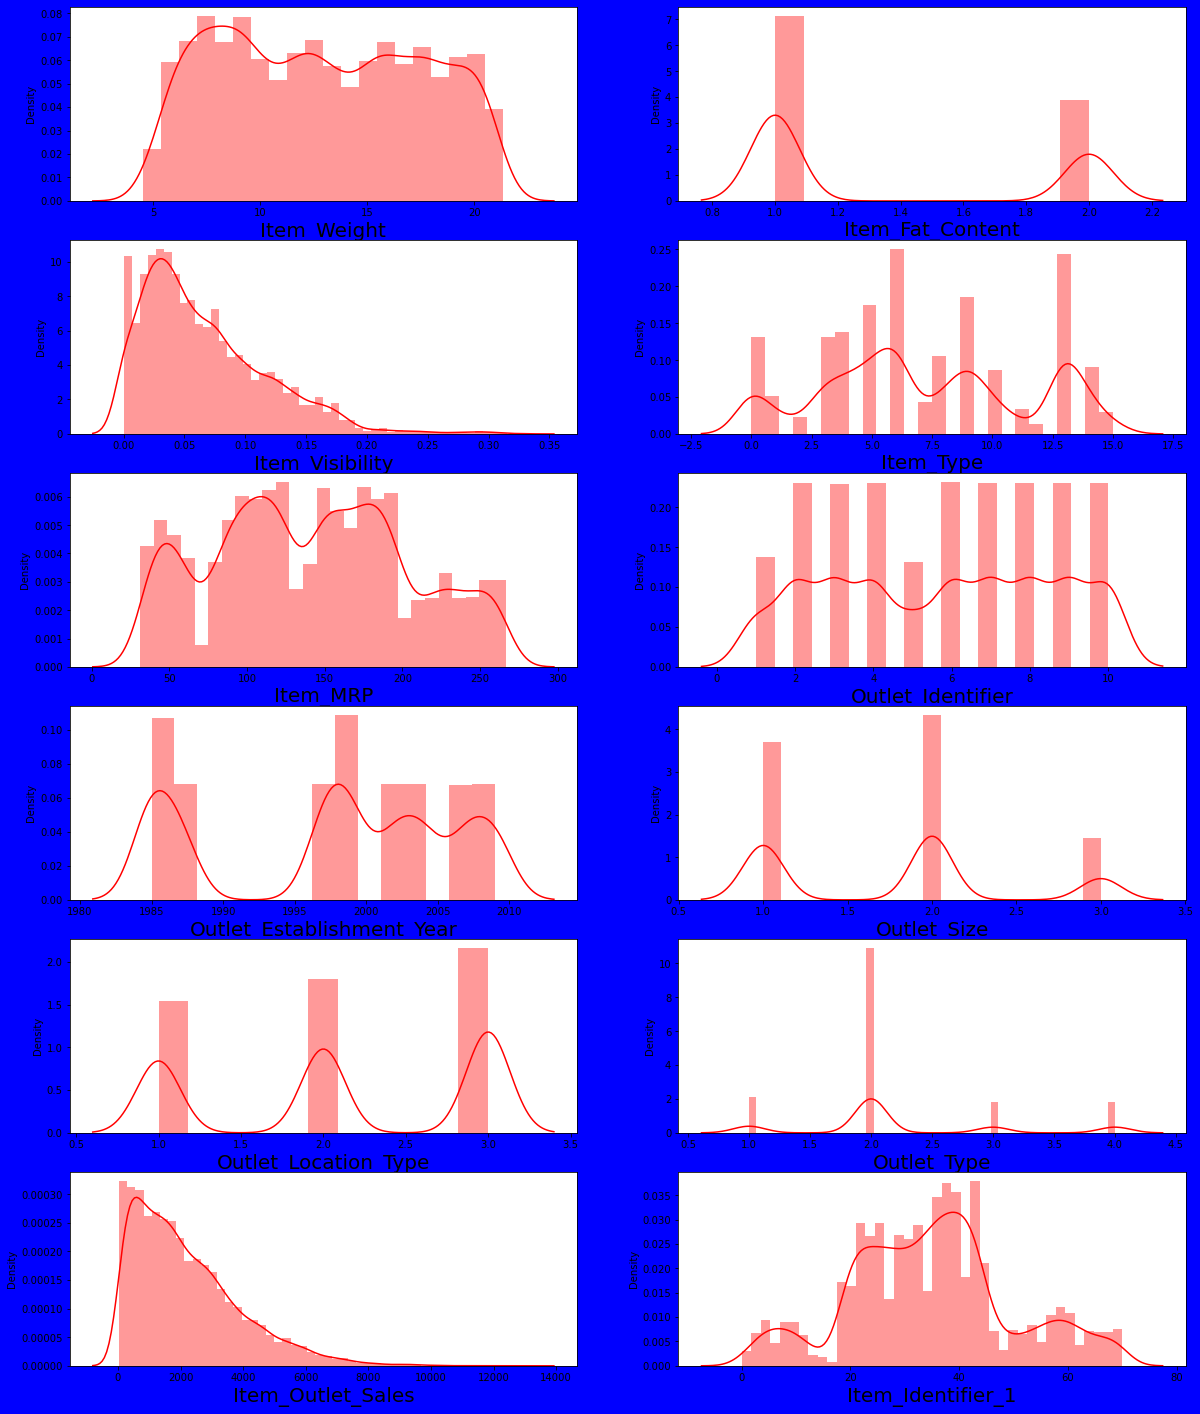

In [29]:
#using dist plot to see skewness 
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df_train1:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df_train[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# we see skewness in only visibility as it is a continuous column

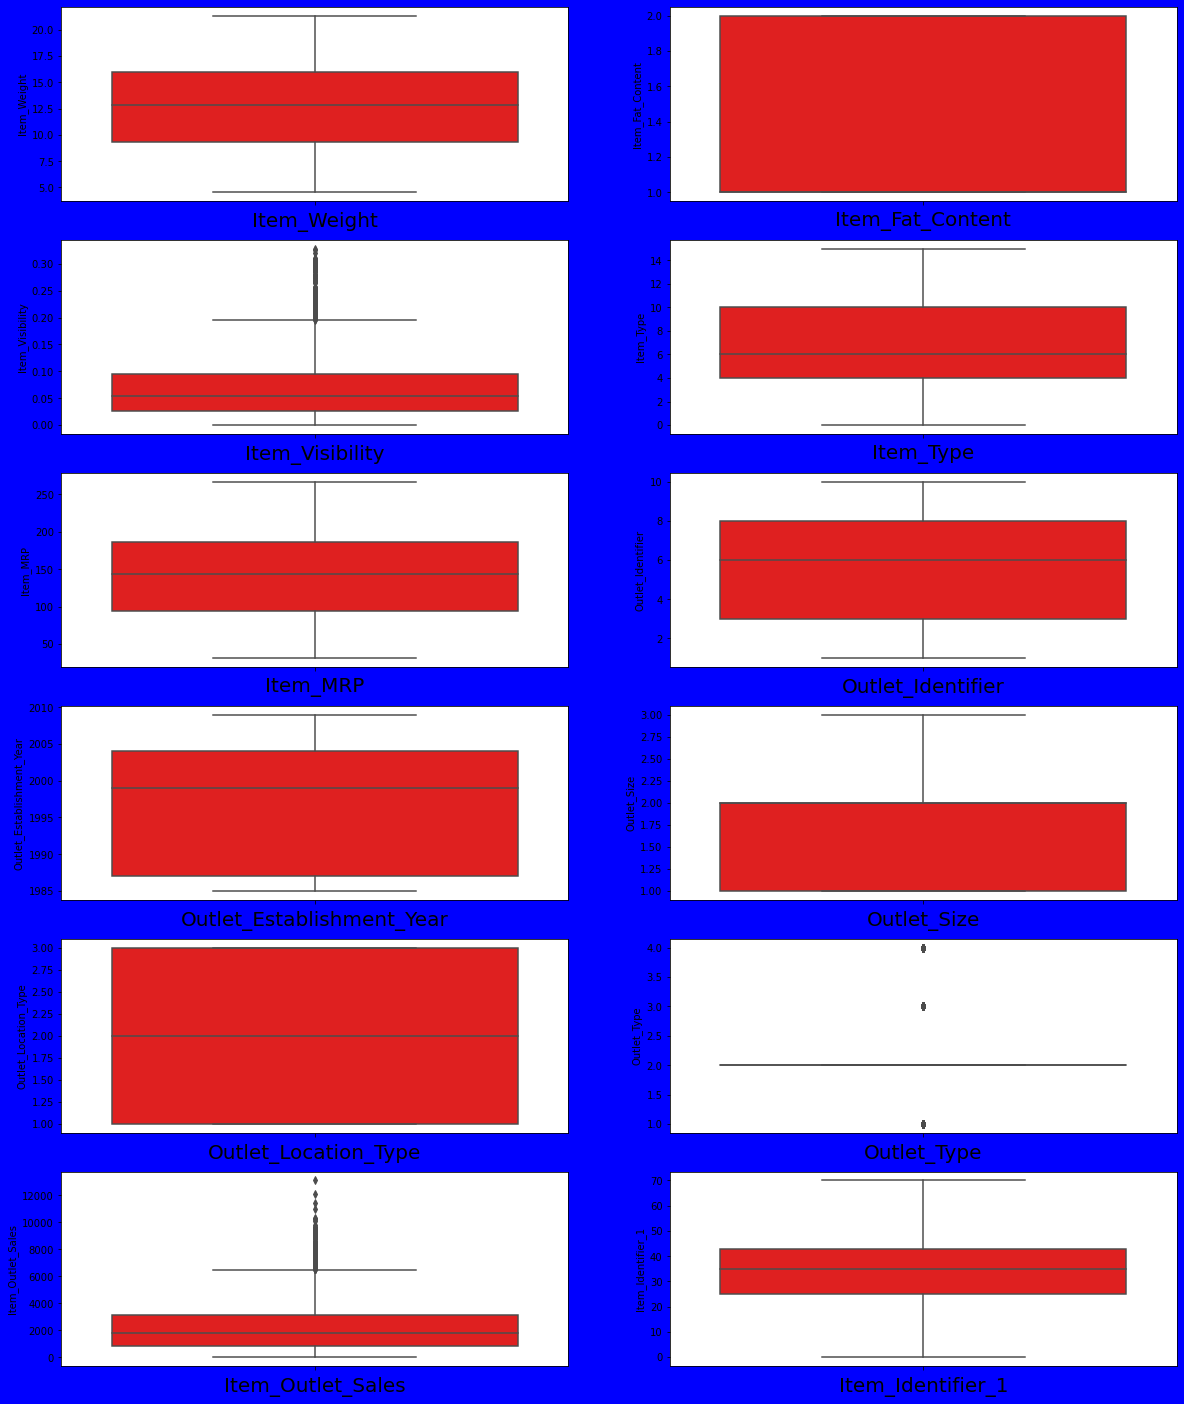

In [30]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df_train1:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df_train1[column],orient='v',color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [31]:
#for removing skewness
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')

In [32]:
df_train1["Item_Visibility"]=scale.fit_transform(df_train1[["Item_Visibility"]].values)
df_train1["Item_Visibility"]

0      -1.146886
1      -1.037100
2      -1.122375
3      -1.745551
4      -1.745551
          ...   
8518    0.020310
8519   -0.221388
8520   -0.542979
8521    1.459990
8522   -0.276195
Name: Item_Visibility, Length: 8523, dtype: float64

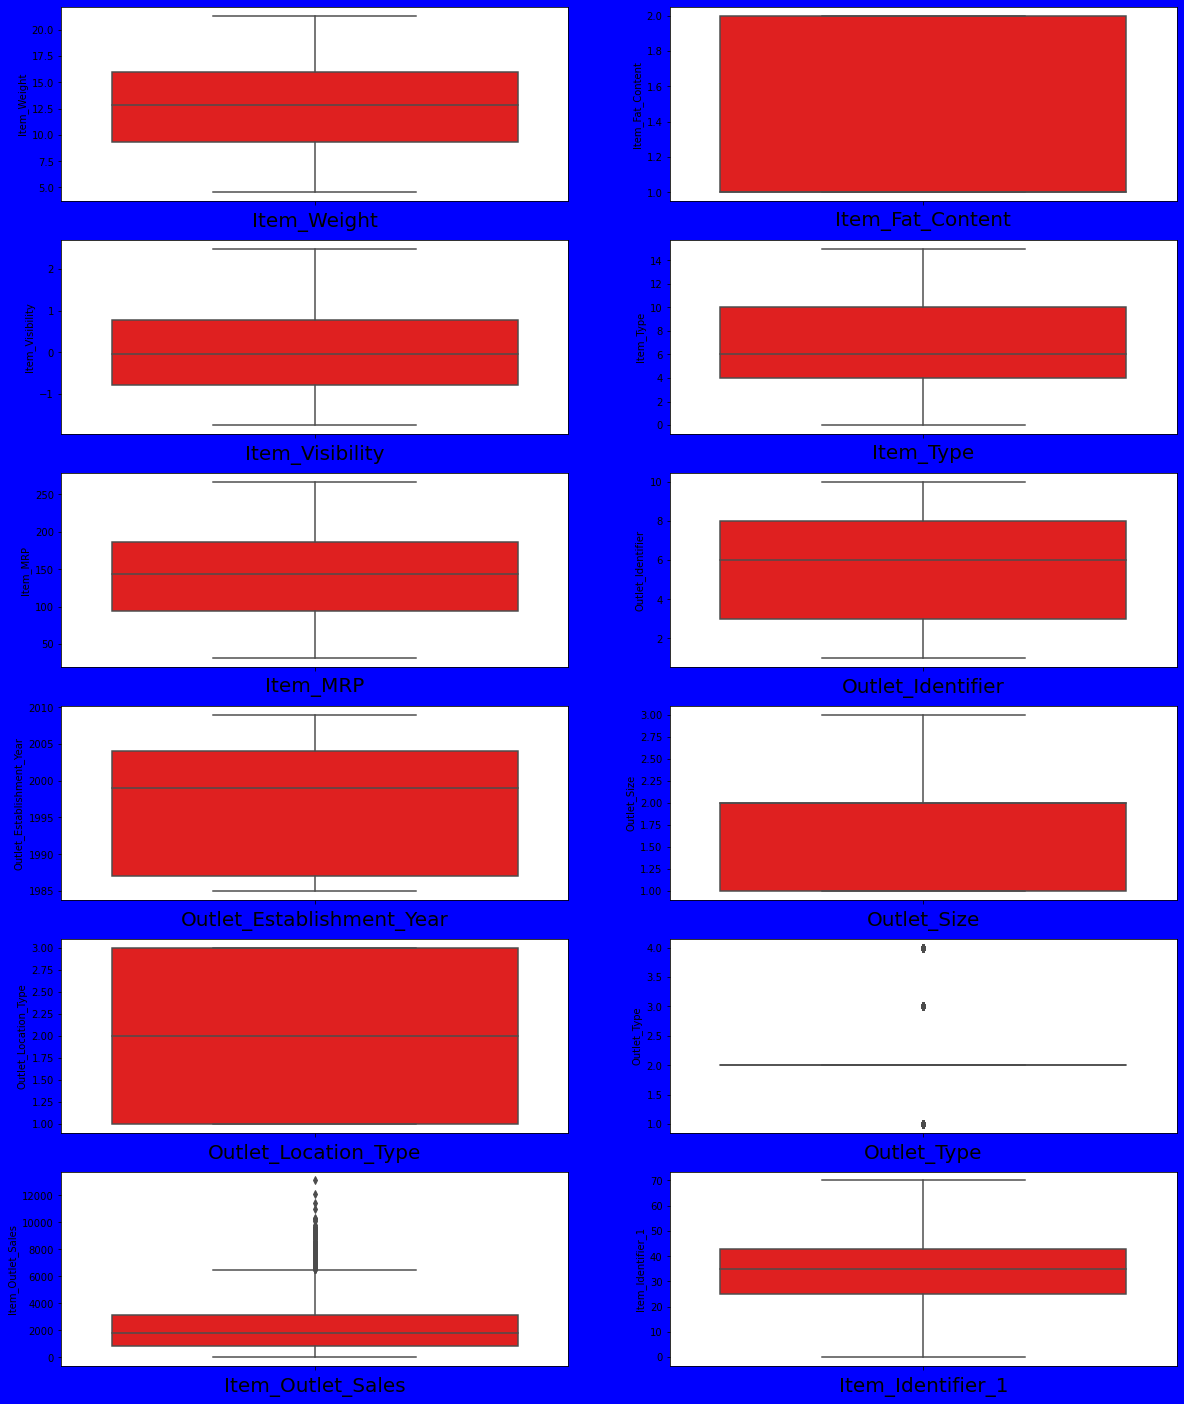

In [33]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df_train1:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df_train1[column],orient='v',color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
I HAVE TAKEN CARE OF OUTLIERS IN VISIBILITY COLUMN AS IT IS A CONTINUOUS COLUMN

# testing dataset

In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


array([<AxesSubplot:ylabel='None'>], dtype=object)

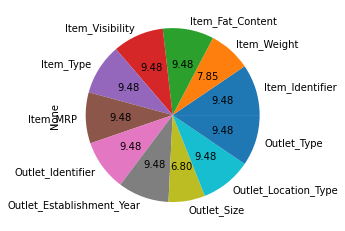

In [35]:

df_test.count().plot.pie(subplots=True,autopct='%.2f',radius=1)

In [36]:
#basic info about dataset
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<AxesSubplot:>

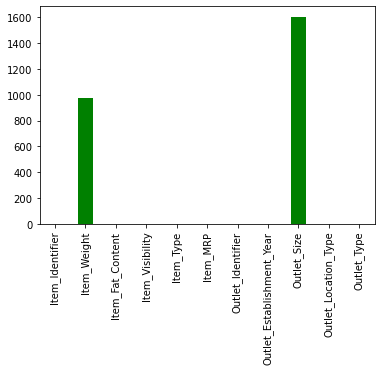

In [37]:
df_test.isnull().sum().plot.bar(color="green")

In [38]:
df_test['Outlet_Identifier']=df_test['Outlet_Identifier'].replace(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'],[10,4,1,2,6,8,3,9,7,5])


df_test["Outlet_Type"]=df_test["Outlet_Type"].replace(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'],[2,3,1,4])


df_test["Outlet_Location_Type"]=df_test["Outlet_Location_Type"].replace(['Tier 1', 'Tier 3', 'Tier 2'],[1,3,2])


df_test["Outlet_Size"]=df_test["Outlet_Size"].replace(['Medium', 'nan', 'High', 'Small'],[2,None,3,1])


df_test["Item_Fat_Content"]=df_test["Item_Fat_Content"].replace(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'],[1,2,1,1,2])

In [39]:
new=[]
for i in df_test["Item_Identifier"]:
    new.append(i[0:3])
df_test["Item_Identifier_1"]=new

In [40]:
new=[]
for i in df_test["Item_Identifier"]:
    new.append(i[3:5])
df_test["Item_Identifier_2"]=new

In [41]:
df_test.drop(["Item_Identifier"],axis=1,inplace=True)

In [42]:
label=LabelEncoder()
df_test["Item_Type"] =  label.fit_transform(df_test["Item_Type"])
df_test["Item_Identifier_1"] =  label.fit_transform(df_test["Item_Identifier_1"])

In [43]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_1,Item_Identifier_2
0,20.750,1,0.007565,13,107.8622,10,1999,2.0,1,2,41,58
1,8.300,2,0.038428,4,87.3198,3,2007,NaN,2,2,41,14
2,14.600,1,0.099575,11,241.7538,1,1998,NaN,3,1,58,55
3,7.315,1,0.015388,13,155.0340,3,2007,NaN,2,2,35,58
4,NaN,2,0.118599,4,234.2300,6,1985,2.0,3,4,43,38
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,9,1997,1.0,1,2,20,58
5677,7.600,2,0.142991,15,169.1448,4,2009,2.0,3,3,22,47
5678,10.000,1,0.073529,8,118.7440,8,2002,NaN,2,2,59,17
5679,15.300,2,0.000000,3,214.6218,3,2007,NaN,2,2,28,26


<function matplotlib.pyplot.show(close=None, block=None)>

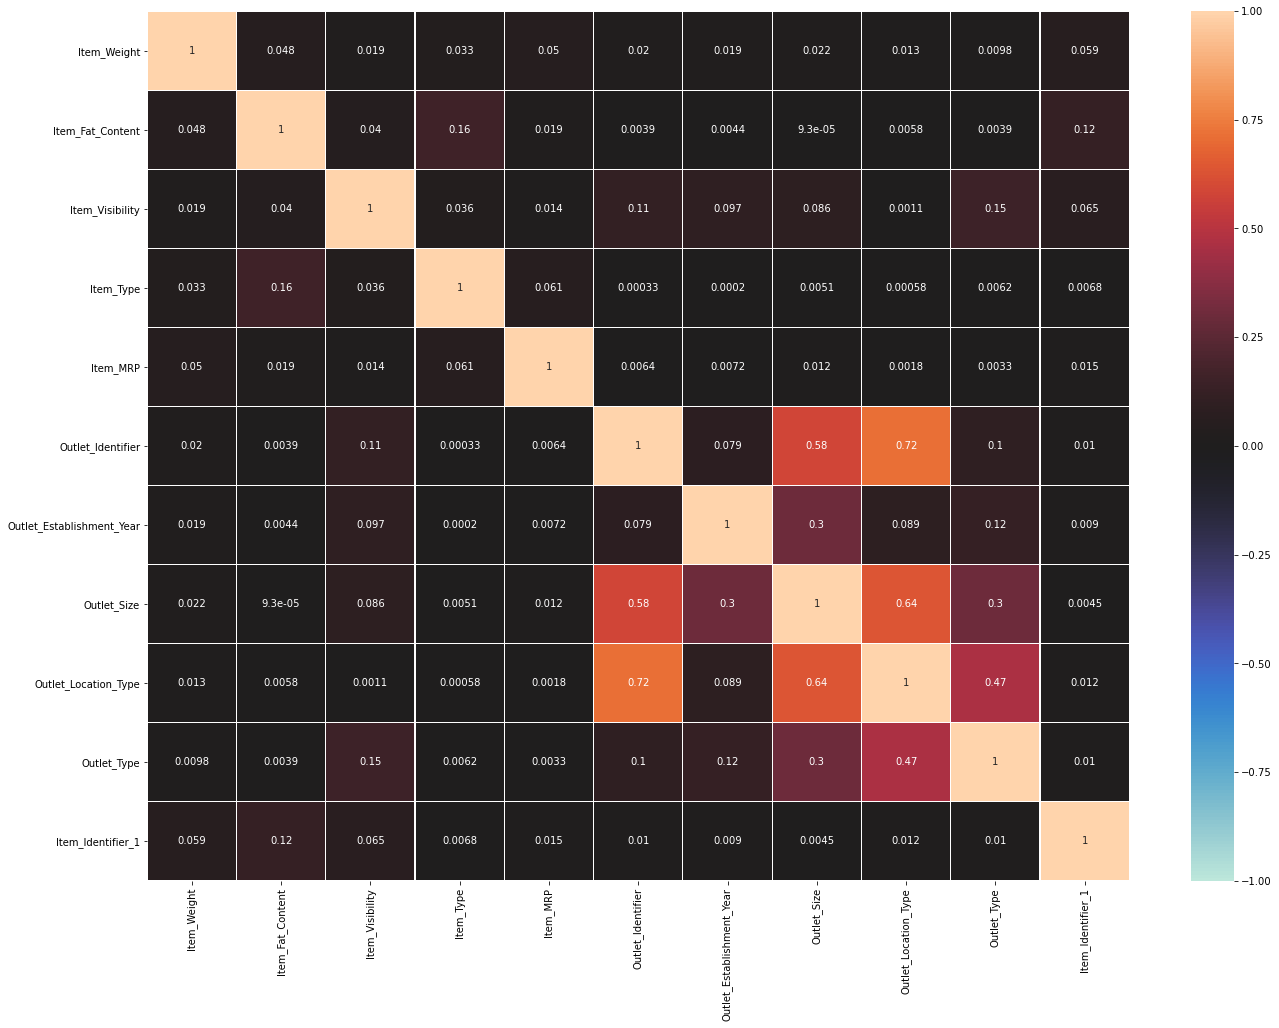

In [44]:
df_corr=df_test.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

In [45]:
#using imputer for filling nan values
from sklearn .experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [46]:
iter_imputer= IterativeImputer(random_state=0)
iter_imputer.fit(df_test)

IterativeImputer(random_state=0)

In [47]:
df2=iter_imputer.transform(df_test)

In [48]:
cols=["Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Identifier_1","Item_Identifier_2"]

In [49]:
df_test1=pd.DataFrame(df2[:,[df_test.columns.get_loc(i)for i in cols]],columns=cols)

In [50]:
df_test1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_1,Item_Identifier_2
0,20.750000,1.0,0.007565,13.0,107.8622,10.0,1999.0,2.000000,1.0,2.0,41.0,58.0
1,8.300000,2.0,0.038428,4.0,87.3198,3.0,2007.0,1.097849,2.0,2.0,41.0,14.0
2,14.600000,1.0,0.099575,11.0,241.7538,1.0,1998.0,2.672754,3.0,1.0,58.0,55.0
3,7.315000,1.0,0.015388,13.0,155.0340,3.0,2007.0,1.146872,2.0,2.0,35.0,58.0
4,13.062767,2.0,0.118599,4.0,234.2300,6.0,1985.0,2.000000,3.0,4.0,43.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2.0,0.013496,13.0,141.3154,9.0,1997.0,1.000000,1.0,2.0,20.0,58.0
5677,7.600000,2.0,0.142991,15.0,169.1448,4.0,2009.0,2.000000,3.0,3.0,22.0,47.0
5678,10.000000,1.0,0.073529,8.0,118.7440,8.0,2002.0,1.969248,2.0,2.0,59.0,17.0
5679,15.300000,2.0,0.000000,3.0,214.6218,3.0,2007.0,1.135585,2.0,2.0,28.0,26.0


In [51]:
#checking nan value
df_test1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Identifier_1            0
Item_Identifier_2            0
dtype: int64

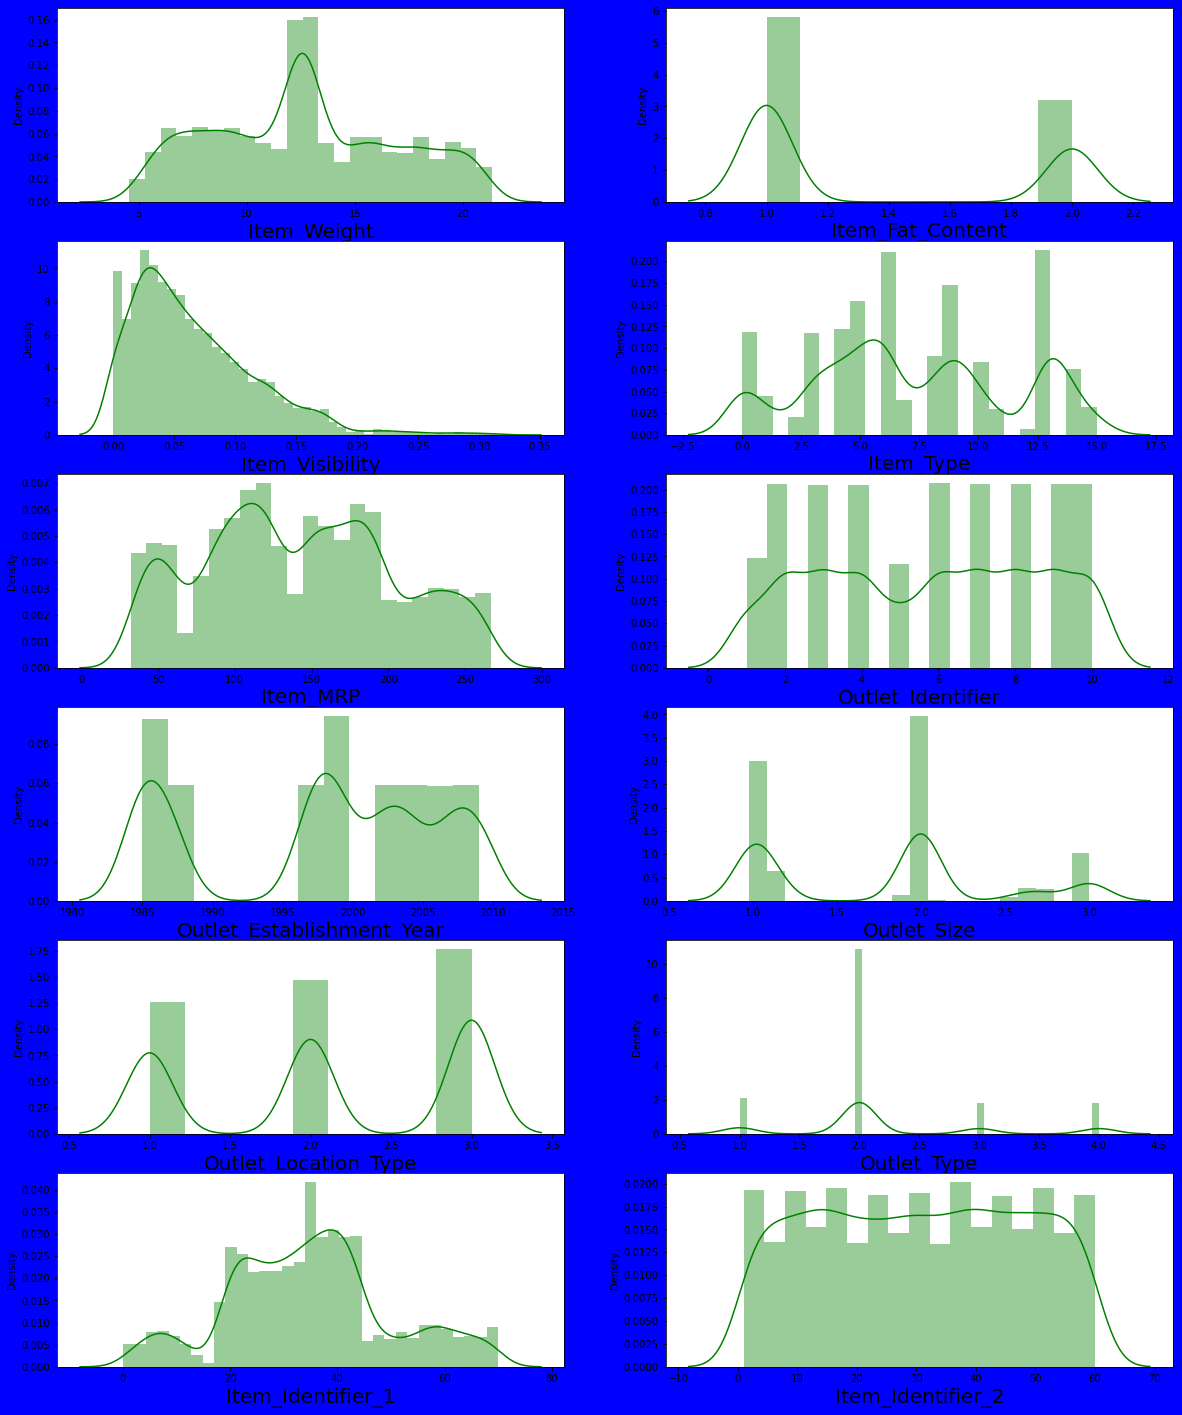

In [52]:
#using dist plot to see skewness 
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df_test1:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(df_test1[column],color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

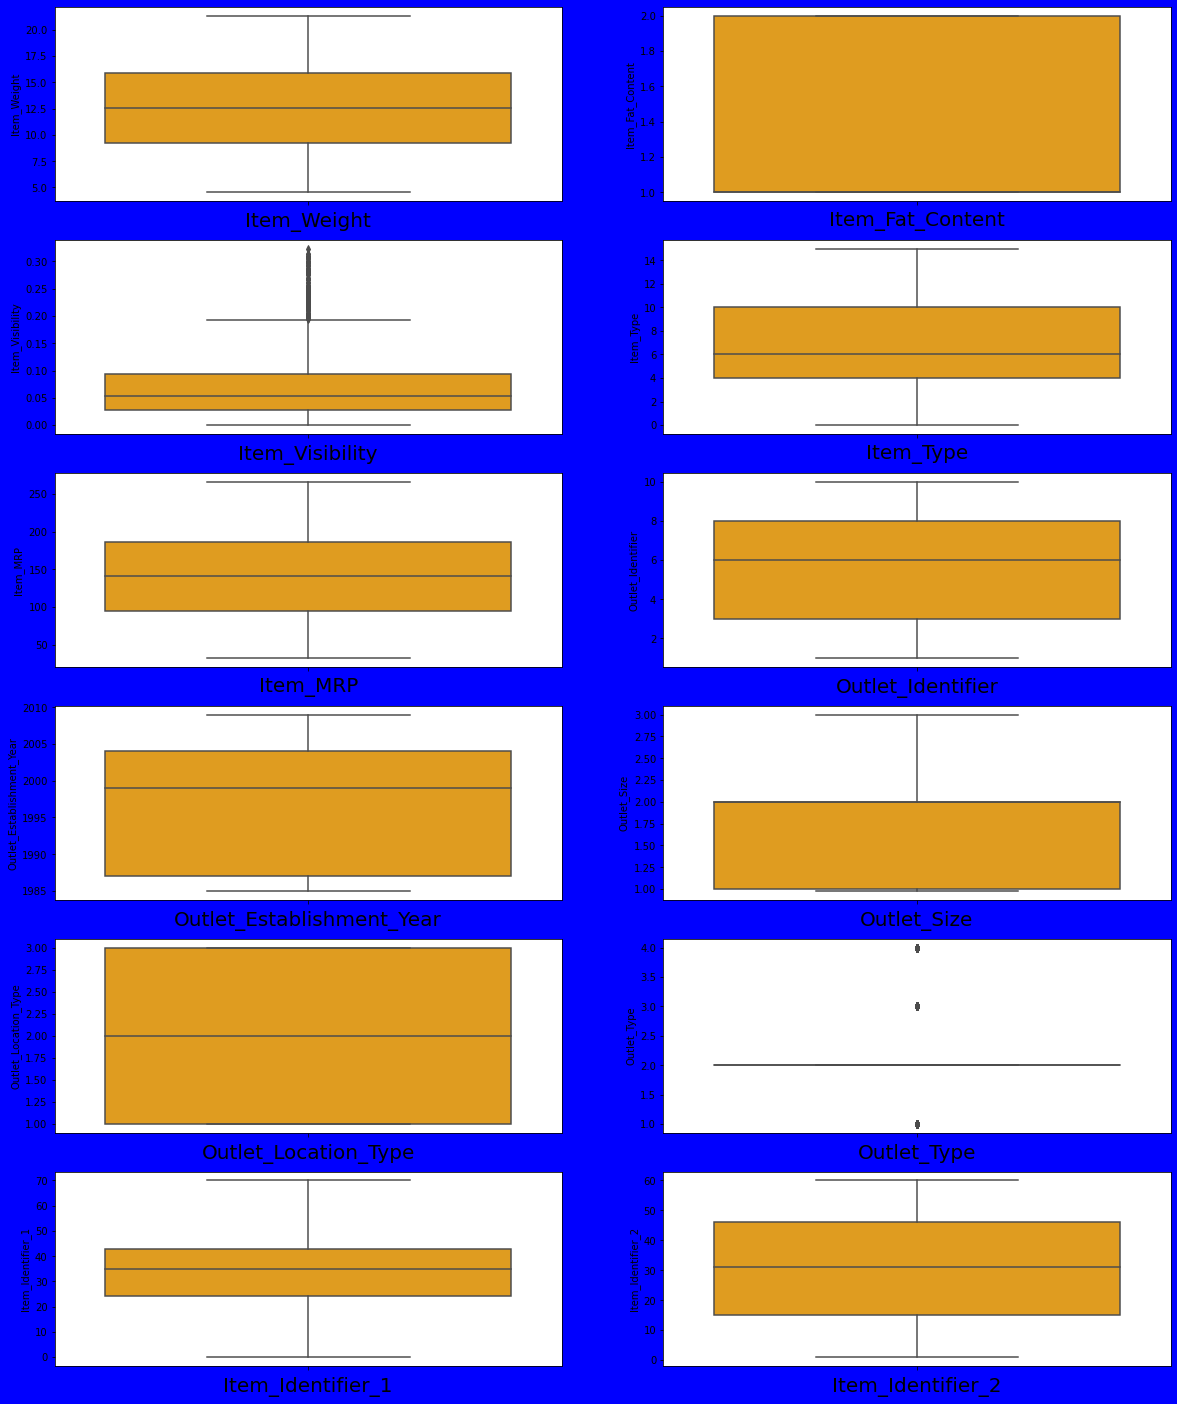

In [53]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df_test1:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df_test1[column],orient='v',color="orange")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [54]:
#for removing skewness
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method='yeo-johnson')

In [55]:
df_test1["Item_Visibility"]=scale.fit_transform(df_test1[["Item_Visibility"]].values)
df_test1["Item_Visibility"]

0      -1.462069
1      -0.448019
2       0.871342
3      -1.175927
4       1.153823
          ...   
5676   -1.243150
5677    1.453584
5678    0.397868
5679   -1.760234
5680    0.952488
Name: Item_Visibility, Length: 5681, dtype: float64

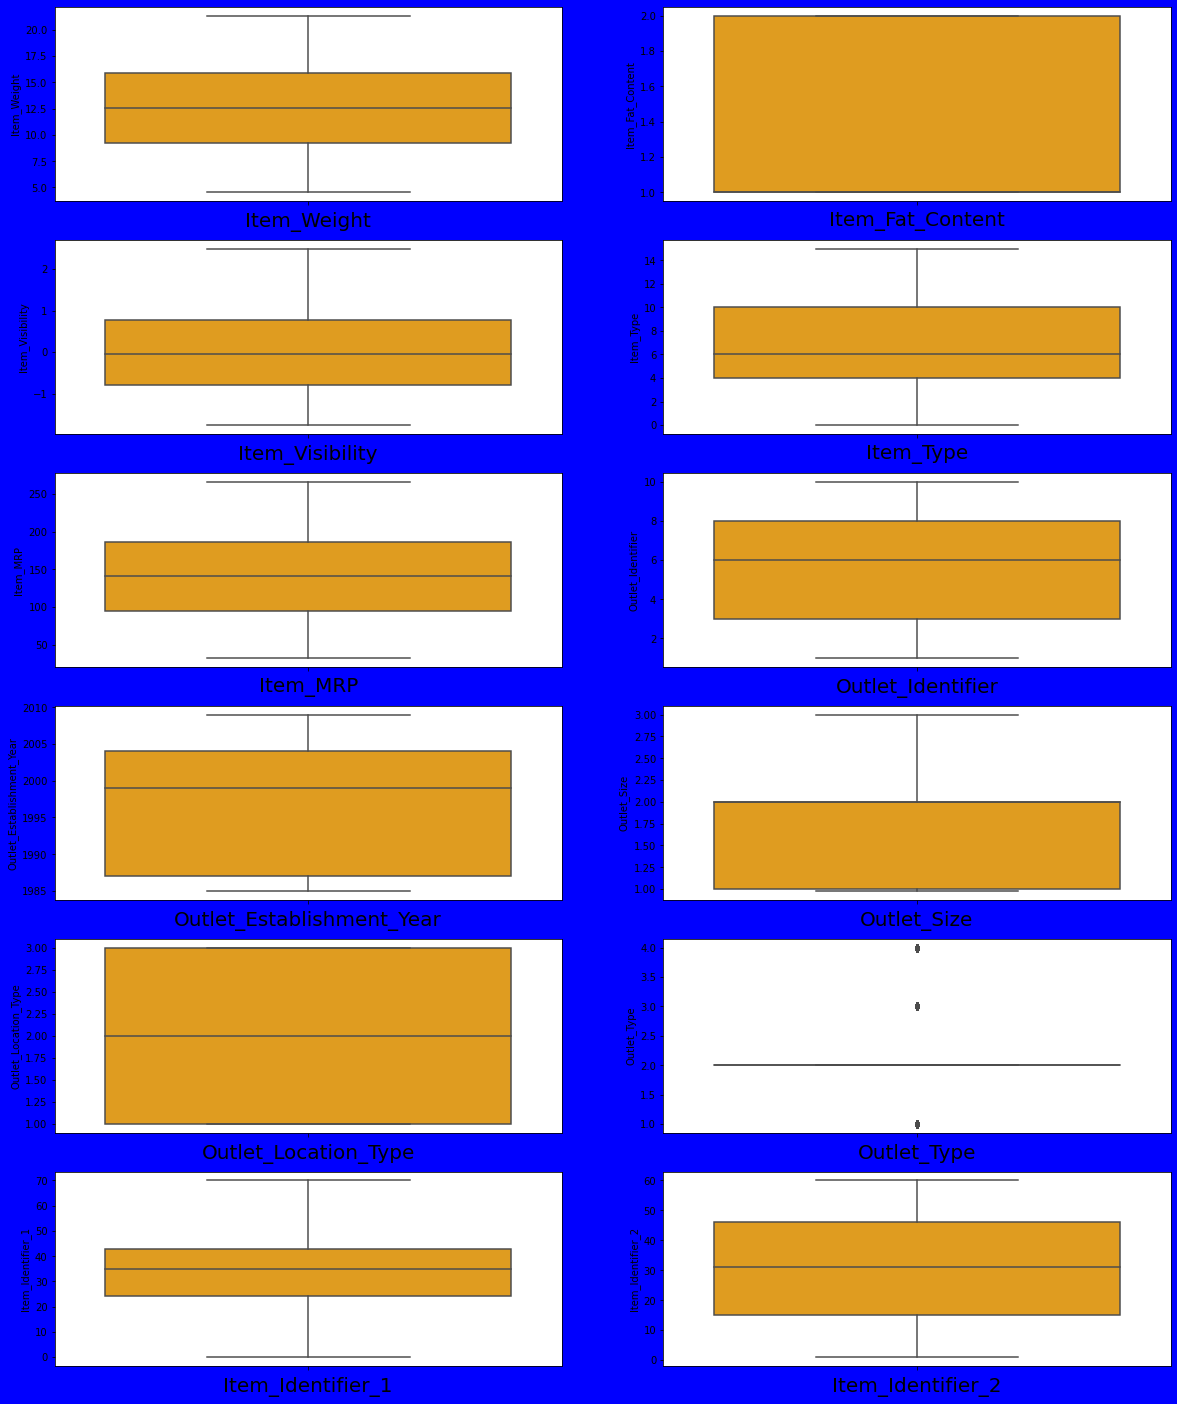

In [56]:
#using box plot to see outliers in the dataset
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df_test1:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df_test1[column],orient='v',color="orange")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# splitting data set for model building

In [57]:
x=df_train1.drop(columns='Item_Outlet_Sales',axis=1)
y=df_train1['Item_Outlet_Sales']

# model building

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [59]:
#using standard scaler to scale dataset
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=50)

# Decision tree model

In [61]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
clf.score(x_train,y_train)

1.0

In [63]:
cross_val_score(clf,x_scaled,y,cv=5).mean()

0.18875967023009338

In [64]:
y_pred = clf.predict(x_test)

In [65]:
r2_score(y_test,y_pred)

0.2453835331277603

# linear regression 

In [66]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred=linear.predict(x_test)

In [68]:
r2_score(y_test,y_pred)

0.5058993097600253

In [69]:
cross_val_score(linear,x_scaled,y,cv=5).mean()

0.49994572242835356

# gbdt

In [70]:
gd = GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [71]:
y_pred=gd.predict(x_test)

In [72]:
r2_score(y_test,y_pred)

0.6062109943739774

In [73]:
cross_val_score(gd,x_scaled,y,cv=5).mean()

0.5965491321863634

# bagging regressor

In [74]:
bag_knn = BaggingRegressor()
bag_knn.fit(x_train,y_train)

BaggingRegressor()

In [75]:
y_pred=bag_knn.predict(x_test)

In [76]:
r2_score(y_test,y_pred)

0.5406122430359823

In [77]:
cross_val_score(bag_knn,x_scaled,y,cv=5,).mean()

0.5327324610011537

# linear regression is my best model

In [78]:
param_search ={"copy_X":[True,False],
               "normalize":[True,False],
               "fit_intercept":[True,False]
               }

In [79]:
grid_search = GridSearchCV(estimator = linear,
                          param_grid = param_search,
                          cv=3,n_jobs=-1)

In [80]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [81]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [82]:
linear = LinearRegression(copy_X=True,fit_intercept=True,normalize=True)

In [83]:
linear.fit(x_train,y_train)

LinearRegression(normalize=True)

In [84]:
y_pred = linear.predict(x_test)

In [85]:
r2_score(y_test,y_pred)

0.5058993097600253

In [86]:
cross_val_score(linear,x_scaled,y,cv=5).mean()

0.49994572242835356

# passing the actual testing dataset in the best model 

In [88]:
y_pred=linear.predict(scale.fit_transform(df_test1))

In [92]:
#SAVING THE PREDICTED DATASET
save=pd.DataFrame(y_pred)

In [93]:
import pickle
filename='big_data_mart.pk1'
pickle.dump(linear,open(filename,'wb'))